# KKT conditions

In this practice we will put in practice the concepts seen in the theory sessions to solve some problems. We will use the KKT conditions and a Python function.

In [1]:
import numpy as np
from scipy.optimize import minimize

import os
from PIL import Image 
import matplotlib.pyplot as plt

## **1. Kaurush-Kuhn-Tucker optimally conditions.**

First we will see a summary of the KKT conditions and then will proceed to solve the exercises.

Given a function f(x) to minimize and some constraints as equalities, we will need to use the Lagrange Multipliers method to find a minimum. 
When the constraints have inequalities we will use the KKT conditions (an extension of the method) to find our minimum. This conditions are dual and primal feasibility, dual positivity and complementary slackness. (You can find the formulas well written in the pdf of the lab).

We can solve this problems visually(you plot f(x) and it's constraints and then you could see the solution), solving the equations by hand (as far as we have seen, there is no concrete method to where to start solving the formulas, we just start and then try to solve without any contradiction) and with functions.

### **1.1 Toy problem**

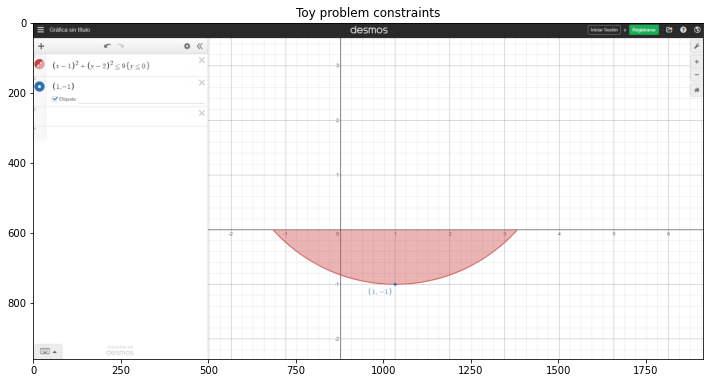

In [3]:
# Define the images directory
images_dir = os.path.abspath("../images")

# Read all the required images
toy = Image.open(os.path.join(images_dir, "Toy.png"))


fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
ax1.imshow(toy)
ax1.set_title("Toy problem constraints")
plt.show()


There is a screenshot of the two constraints plotted in Desmos: Constraint1(circle with radius 3 centered at (1,,2)) such that Constraint2(y<=0). Visually it's easy to see that the point with minimizes y is (1,-1).

Now we will use the minimize function from scipy library to verify our results.

In [15]:
def objective(x):#obejective function
    return x[1]

def constraint_1(x):#first constraint(inequality)
    first= -(x[0]-1)**2
    scnd= -(x[1]-2)**2
    return (first+scnd+9)

def constraint_2(x):#second constraint(inequality)
    return -x[1]

con1={'type': 'ineq', 'fun':constraint_1}
con2={'type': 'ineq', 'fun':constraint_2}
cons=([con1,con2])

x0=[1,1] #first guess for our function

solution= minimize(objective, x0, method='SLSQP',constraints=[con1])
x=solution.x
print(x)

[ 1. -1.]


As expected, we got the correct solution for this problem.

Finally, we will manually check that the solution verifies the constraints problems and that we can find a solution for the dual variables. **This part is in the folder /pdfs**.

We were able to solve for all the unkowns, which means that the solution is correct. Remember that if a constraint = 0, it is an active constraint and it means that the solution is in the border of it. Otherwise, we say that the solution is an interior point and the constraint is not active.

### **1.2 Water-filling**

For this problem we will follow the same steps as before and we will check that the result also verifies the KKT conditions.

We will test the solution for a uniform alpha and for a random one.

Also observe that using the notation x>=0 implies 4 constrains, since each value of x has to satisfy the condition by itself, so in my scan you will see that I used lambda_i to short a bit the development of the Lagrangian, but at the end I write the constraints as they should be.

In [4]:
n=4

def objective(x,alpha):#obejective function
    total=0
    for i in range (n):
        total+=np.log(x[i]+alpha[i])
    
    return -total
        

def constraint_1(x):#first constraint(inequality)
    return (x)

def constraint_2(x):#second constraint(equality)
        
    return x.sum()-1

con1={'type': 'ineq', 'fun':constraint_1}
con2={'type': 'eq', 'fun':constraint_2}
cons=([con1,con2])

alpha =np.array([0.25]*4)
x0=[1,1,1,1] #first guess for our function

solution= minimize(objective, x0, args=(alpha), method='SLSQP',constraints=cons)
x=solution.x
print(x)

[0.25 0.25 0.25 0.25]


In [5]:
np.random.seed(4)
alpha =np.random.random(4)*0.25
x0=[1,1,1,1] #first guess for our function

solution= minimize(objective, x0, args=(alpha), method='SLSQP',constraints=cons)
x=solution.x
print(x)

[0.20822484 0.31346208 0.2068035  0.27150957]


Again, we verified the correctness for both solutions and got that the dual variables for the inequalities where the same for both cases (0) but they difered at the dual values of the equality. Since we had 4 equation with only one unkown to solve the latter variable, we needed that (xi + alpha_i) was the same value, wich effectively was.

### **1.3 Entropy Maximization**

For this last problem apart from having read some documention to correctly fit the parameters in the function, and being careful with manipulating the inequalitias with defined matrices and vectors, there wasn't any more difficulty than in the other problems. 

We followed the same procedure and then checked the conditions. Again, there are two inequalities "hidden" in one.

In [2]:
A=np.matrix([[2, 0],[0, 3]])
b=np.array([7,1])
n=2

def objective(x):#obejective function
    total=0
    for i in range (n):
        total+=np.log(x[i])*x[i]
    
    return total
        

def constraint_1(x,A,b):#first constraint(inequality)
    matrx=(b-np.matmul(A,x))
    vector=np.asarray(matrx).reshape(-1)
    return vector

def constraint_2(x):#second constraint(equality)
    return x.sum()-1

A=np.matrix([[2, 0],[0, 3]])
b=np.array([7,1])

con1={'type': 'ineq', 'fun':constraint_1,'args':(A,b)}
con2={'type': 'eq', 'fun':constraint_2}
cons=([con1,con2])


x0=np.array([1,1]) #first guess for our function

solution= minimize(objective, x0, method='SLSQP',constraints=cons)

x=solution.x
print(x)

[0.66666667 0.33333333]


## **Conclusion**

In this lab we learned to work with KKT conditions and solved some well known problems, implementing algorithms and checking them by hand, apart from visualising some solutions.